In [1]:
#instal libraries

#pip install sentence-transformers
#pip install umap-learn
#pip install hdbscan

In [1]:
#import libraries

import re
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#reads in california constitution

#i need to clean the data more

with open('/Users/jianingcai/Downloads/2008.txt', 'r') as f:
    data = f.read()

In [21]:
data

[' IRON  MAN',
 'by',
 ' Matt Holloway & Art  Marcum',
 'and',
 ' Mark Fergus & Hawk Ostby',
 'Based on the  Marvel  Comic',
 'Revisions by:',
 ' Matt Holloway & Art  Marcum',
 ' Mark Fergus & Hawk Ostby',
 'John August',
 ' Current Revisions by:',
 ' Mark Fergus and Hawk Ostby',
 '',
 ' MARVEL STUDIOS',
 '',
 'SALMON #:',
 ' / /',
 'BUFF #:',
 '//',
 'GOLDENROD #: //',
 'GREEN #:',
 '//',
 'YELLOW #:',
 '//',
 'PINK #:',
 '//',
 'BLUE #:',
 '//',
 'WHITE #:',
 '//',
 'TAN:',
 '//',
 ' CHERRY:',
 '//',
 'SALMON:',
 '//',
 'BUFF:',
 '//',
 'GOLDENROD:',
 '//',
 'GREEN:',
 '//',
 'YELLOW:',
 '//',
 'PINK:',
 '//',
 'BLUE:',
 '//',
 'WHITE:',
 '//',
 '',
 'ALL RIGHTS RESERVED.  COPYRIGHT ©  MARVEL STUDIOS,  INC. NO',
 'PORTION OF THIS SCRIPT  MAY BE PERFORMED, PUBLISHED, REPRODUCED,',
 'SOLD OR  DISTRIBUTED BY ANY  MEANS, OR QUOTED OR PUBLISHED  IN ANY',
 ' MEDIUM,  INCLUDING ANY WEB SITE, WITHOUT THE PRIOR WRITTEN  CONSENT',
 'OF  MARVEL STUDIOS,  INC.  DISPOSAL OF THIS SCRIPT  COPY  DOE

In [4]:
#data cleaning

def clean(text):
    pattern = r"\b(?=[MDCLXVIΙ])M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})([IΙ]X|[IΙ]V|V?[IΙ]{0,3})\b\.?"
    return re.sub(pattern, ' ', text)

data = clean(data)
data = data.replace('SEC.', ' ')

In [5]:
#Removes all numbers
data = ''.join([i for i in data if not i.isdigit()])

In [6]:
data = data.split("\n")    

In [7]:
data

[' IRON  MAN',
 'by',
 ' Matt Holloway & Art  Marcum',
 'and',
 ' Mark Fergus & Hawk Ostby',
 'Based on the  Marvel  Comic',
 'Revisions by:',
 ' Matt Holloway & Art  Marcum',
 ' Mark Fergus & Hawk Ostby',
 'John August',
 ' Current Revisions by:',
 ' Mark Fergus and Hawk Ostby',
 '',
 ' MARVEL STUDIOS',
 '',
 'SALMON #:',
 ' / /',
 'BUFF #:',
 '//',
 'GOLDENROD #: //',
 'GREEN #:',
 '//',
 'YELLOW #:',
 '//',
 'PINK #:',
 '//',
 'BLUE #:',
 '//',
 'WHITE #:',
 '//',
 'TAN:',
 '//',
 ' CHERRY:',
 '//',
 'SALMON:',
 '//',
 'BUFF:',
 '//',
 'GOLDENROD:',
 '//',
 'GREEN:',
 '//',
 'YELLOW:',
 '//',
 'PINK:',
 '//',
 'BLUE:',
 '//',
 'WHITE:',
 '//',
 '',
 'ALL RIGHTS RESERVED.  COPYRIGHT ©  MARVEL STUDIOS,  INC. NO',
 'PORTION OF THIS SCRIPT  MAY BE PERFORMED, PUBLISHED, REPRODUCED,',
 'SOLD OR  DISTRIBUTED BY ANY  MEANS, OR QUOTED OR PUBLISHED  IN ANY',
 ' MEDIUM,  INCLUDING ANY WEB SITE, WITHOUT THE PRIOR WRITTEN  CONSENT',
 'OF  MARVEL STUDIOS,  INC.  DISPOSAL OF THIS SCRIPT  COPY  DOE

In [8]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar = True)

Batches:   0%|          | 0/1444 [00:00<?, ?it/s]

In [9]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

In [10]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean', 
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

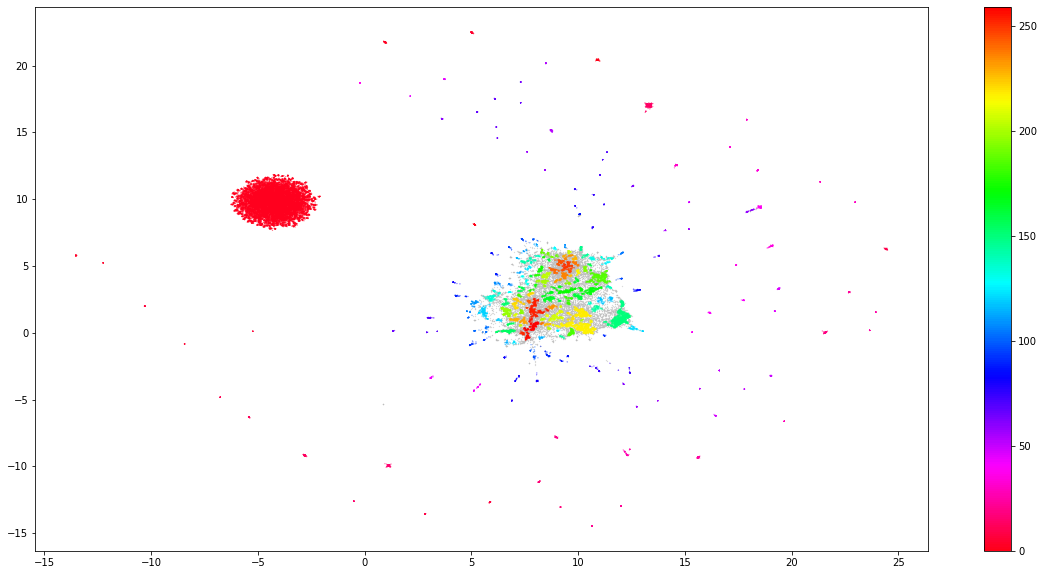

In [11]:
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x','y'])
result['labels'] = cluster.labels_

fig, ax = plt.subplots(figsize=(20,10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color = '#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [12]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [22]:
docs_per_topic

,Topic,Doc
0,-1,IRON MAN BUFF #: YELLOW #: BUFF: YELLOW: BLU...
1,0,NO DUPLICATION WITHOUT MARVEL’S WRITTEN CON...
2,1,Eve. ...
3,2,...
4,3,tier. - ...
...,...,...
256,255,Batman bears down on the dogs mauling another ...
257,256,"One Airman grins, fidgeting with his orange NY..."
258,257,"but the weapon is burning hot. He drops it, mo..."
259,258,An EXPLOSION cuts him off. Rhodey fires throug...


In [13]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [14]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

/var/folders/sx/mxg316554p53ftfz37jrsvnr0000gn/T/ipykernel_69643/3267578824.py:5: RuntimeWarning: invalid value encountered in true_divide
  tf = np.divide(t.T, w)


In [15]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
3,2,16676
0,-1,10518
151,150,1139
218,217,925
15,14,682
187,186,478
254,253,458
219,218,447
17,16,313
39,38,279


In [16]:
len(top_n_words)

261

In [30]:
index = [2, 150, 217, 14, 186, 218]

In [31]:
for i in index:
    print("Topic #", i-1)
    print(top_n_words[i][:7])
    print()

Topic # 1
[('children', 1.5814090858245466), ('kid', 1.4549045740758446), ('baby', 1.4427796497125576), ('earth', 1.382323475337971), ('close', 1.2716464277010135), ('fleas', 0.0), ('flawless', 0.0)]

Topic # 149
[('don', 0.4557397005842949), ('know', 0.1589336409481949), ('didn', 0.12930847830585873), ('want', 0.10120544020673536), ('doesn', 0.09622440261420846), ('won', 0.06906058846460826), ('tell', 0.05318795004061197)]

Topic # 216
[('sorry', 0.14323799625907535), ('bad', 0.09458463436396498), ('wrong', 0.0624726591176831), ('looks', 0.050917333084134785), ('like', 0.04795158771037516), ('asshole', 0.043852544734212184), ('just', 0.04064426350938626)]

Topic # 13
[('classified', 4.676982206029529), ('heads', 3.2829357516416557), ('fledgling', 0.0), ('flawless', 0.0), ('flatworms', 0.0), ('flattens', 0.0), ('flattened', 0.0)]

Topic # 185
[('good', 0.47483722709345744), ('great', 0.17156899763502445), ('nice', 0.11985949287341209), ('perfect', 0.10985066562378121), ('right', 0.1025